In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import seaborn as sns
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit,GridSearchCV,cross_val_score, KFold
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
# rmse
def regression_result(y_true,y_pred):
    mse=metrics.mean_squared_error(y_true, y_pred)
    rmse=round(np.sqrt(mse),4)
    return rmse
    
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score

rmse_score = make_scorer(rmse, greater_is_better = False)

In [3]:
df = pd.read_csv('DataML2.csv')
df['period'] = pd.to_datetime(df['period'], format= '%b-%y')

In [4]:
df.index.name = None

In [5]:
df = df.set_index('period')

In [6]:
df = df.drop(df.index[108])
df

,gdprl,csplrl,csprl,cslrl,csgrl,invrl,xgsrl,mgsrl,inhrl,inbrl,...,goog_groc,goog_parks,goog_transit,goog_work,goog_res,goog_avg,IPBK,IPAMM,ITP,IIK
period,,,,,,,,,,,,,,,,,,,,,
2012-01-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,19.656792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,19.656792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-3.485374,-4.001398,-4.046090,-1.967292,9.759699,-6.479756,-11.657055,-23.003171,-5.600000,-8.989116,...,-0.161290,-5.580645,-31.935484,-19.935484,10.258065,-10.322581,43.199396,33.786565,36.874311,32.240753
2020-09-01,-3.485374,-4.001398,-4.046090,-1.967292,9.759699,-6.479756,-11.657055,-23.003171,-5.600000,-8.989116,...,-2.333333,-10.366667,-36.000000,-18.866667,11.766667,-12.188889,37.466078,27.929502,32.982781,29.337052
2020-10-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,-4.708003,...,0.064516,-7.645161,-32.193548,-23.000000,9.774194,-11.833333,40.786587,34.514693,34.757150,31.410465


In [7]:
data = df.drop(columns=['onlinesales', 'onlinetranspr','konsumsiskn', 'IHPRsekunder', 'jalantolgol1', 'inflasipendidikan', 
                        'inflasikesehatan', 'devisa_transpor', 'devisa_travel', 'imporkonstruksi', 'orderbook', 
                        'voltraffgol3', 'voltraffgol5', 'presalesprop', 'voltraffgol4', 'goog_retail', 
                        'goog_groc', 'goog_parks', 'goog_transit', 'goog_work', 'goog_res', 
                        'goog_avg', 'IPBK', 'IPAMM', 'ITP', 'IIK', 'gdprl','csplrl',
                       'csprl','cslrl','csgrl','invrl','xgsrl','mgsrl','inhrl','retailsales'])
data

,inbrl,sukucadang,manminrok,bbm,gadget,perlengkapanrt,barangbudaya,baranglain,barangsandang,mobilsales,...,rtgs,prod_motor,ekspor_nm_rl,impor_nm_rl,ekspor_nm_pi,impor_nm_pi,ekspor_mg_nl,impor_mg_nl,sup_valas_jl,sup_valas_bl
period,,,,,,,,,,,,,,,,,,,,,
2012-01-01,11.224086,95.462254,116.436824,102.782781,125.647975,131.069978,97.748775,111.269651,122.355941,76427,...,1140089.390,76188,10723.58466,12242.559210,114.919980,93.455990,3142.633968,3019.327583,22442499.63,24912810.16
2012-02-01,11.224086,86.876906,108.690942,97.354248,125.245195,130.186828,101.825121,102.109056,110.749180,86486,...,1156648.290,85747,10887.07557,12490.456360,114.851202,94.569651,3355.479572,3492.652399,21664503.45,23836369.39
2012-03-01,11.224086,93.026262,116.452079,101.673305,120.550990,130.424904,105.193351,106.808437,114.664600,87917,...,1206328.900,85097,11523.35706,12946.806280,116.810881,94.238671,3486.095481,4008.890181,20912505.05,22648459.89
2012-04-01,19.656792,86.914016,114.365660,102.643388,118.729045,131.977762,102.909736,105.629696,112.962527,87144,...,1172728.360,83721,10792.98152,12948.428110,116.763896,94.778955,3560.730493,4120.395283,20284957.19,20772381.34
2012-05-01,19.656792,93.110160,117.775489,96.640337,115.126069,137.719549,103.730032,114.997415,123.943550,95541,...,1346689.120,90869,11388.35403,14052.304160,116.015932,94.502227,3724.886311,3442.100000,21893002.43,26047380.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-8.989116,118.228910,238.195283,65.447093,250.935422,138.497428,66.966929,79.522759,62.685797,37277,...,2026929.250,29584,10521.42765,9794.608347,118.571234,100.441673,598.700000,949.800000,24880135.45,23809095.74
2020-09-01,-8.989116,118.658436,235.330999,67.500583,241.236428,135.682770,64.429920,79.261946,64.796720,48554,...,2346047.680,59573,11142.52793,10292.517290,119.598267,101.134059,668.400000,1173.000000,26695283.37,26237659.74
2020-10-01,-4.708003,118.706834,222.743949,71.029015,212.706197,132.480744,65.040389,77.731932,66.348474,49018,...,2163810.000,66378,11447.17000,9458.295633,120.325798,102.814970,613.400000,1078.800000,24700714.17,23894242.42


In [8]:
data = data[['inbrl','IKE','mobilsales','IKK','motorsales','barangbudaya','prod_motor',
             'impor_nm_rl','pmi','salesalatberat']]
data

,inbrl,IKE,mobilsales,IKK,motorsales,barangbudaya,prod_motor,impor_nm_rl,pmi,salesalatberat
period,,,,,,,,,,
2012-01-01,11.224086,110.900000,76427,119.200000,645863,97.748775,76188,12242.559210,48.49,617.0
2012-02-01,11.224086,103.500000,86486,111.700000,666136,101.825121,85747,12490.456360,50.63,769.0
2012-03-01,11.224086,102.400000,87917,107.300000,619678,105.193351,85097,12946.806280,50.82,821.0
2012-04-01,19.656792,97.600000,87144,102.500000,617508,102.909736,83721,12948.428110,50.46,749.0
2012-05-01,19.656792,103.800000,95541,109.000000,611251,103.730032,90869,14052.304160,48.04,773.0
...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-8.989116,55.599832,37277,86.899667,317107,66.966929,29584,9794.608347,50.80,105.0
2020-09-01,-8.989116,54.135689,48554,83.357487,380713,64.429920,59573,10292.517290,47.20,148.0
2020-10-01,-4.708003,51.463568,49018,79.018127,317830,65.040389,66378,9458.295633,47.80,154.0


In [9]:
data = data.dropna()
data

,inbrl,IKE,mobilsales,IKK,motorsales,barangbudaya,prod_motor,impor_nm_rl,pmi,salesalatberat
period,,,,,,,,,,
2012-01-01,11.224086,110.900000,76427,119.200000,645863,97.748775,76188,12242.559210,48.49,617.0
2012-02-01,11.224086,103.500000,86486,111.700000,666136,101.825121,85747,12490.456360,50.63,769.0
2012-03-01,11.224086,102.400000,87917,107.300000,619678,105.193351,85097,12946.806280,50.82,821.0
2012-04-01,19.656792,97.600000,87144,102.500000,617508,102.909736,83721,12948.428110,50.46,749.0
2012-05-01,19.656792,103.800000,95541,109.000000,611251,103.730032,90869,14052.304160,48.04,773.0
...,...,...,...,...,...,...,...,...,...,...
2020-07-01,-8.989116,50.663358,25283,86.190957,292205,72.657681,24413,9396.042999,46.90,85.0
2020-08-01,-8.989116,55.599832,37277,86.899667,317107,66.966929,29584,9794.608347,50.80,105.0
2020-09-01,-8.989116,54.135689,48554,83.357487,380713,64.429920,59573,10292.517290,47.20,148.0


In [10]:
scaler = StandardScaler()
scaler = scaler.fit_transform(data.values)
scaler

array([[ 1.19405022,  0.49491625, -0.53653613, ...,  0.54059473,
        -0.24389608,  2.15364207],
       [ 1.19405022,  0.01310275, -0.04973022, ...,  0.70967145,
         0.37102711,  3.16294459],
       [ 1.19405022, -0.05851818,  0.01952311, ...,  1.0209221 ,
         0.42562309,  3.50823229],
       ...,
       [-1.83735515, -3.20100425, -1.88545165, ..., -0.78941931,
        -0.61457407, -0.96058741],
       [-1.19531   , -3.37498588, -1.86299634, ..., -1.35839503,
        -0.4421657 , -0.92074652],
       [-1.19531   , -2.80992806, -1.62992573, ..., -0.26666958,
         0.36240669, -1.04026919]])

In [11]:
data = pd.DataFrame(scaler, columns = data.columns, index = data.index)
data

,inbrl,IKE,mobilsales,IKK,motorsales,barangbudaya,prod_motor,impor_nm_rl,pmi,salesalatberat
period,,,,,,,,,,
2012-01-01,1.194050,0.494916,-0.536536,0.410236,0.882459,-0.675434,-0.879790,0.540595,-0.243896,2.153642
2012-02-01,1.194050,0.013103,-0.049730,-0.287050,1.044240,-0.411798,-0.461810,0.709671,0.371027,3.162945
2012-03-01,1.194050,-0.058518,0.019523,-0.696124,0.673500,-0.193959,-0.490232,1.020922,0.425623,3.508232
2012-04-01,2.458716,-0.371046,-0.017886,-1.142388,0.656183,-0.341651,-0.550400,1.022028,0.322178,3.030142
2012-05-01,2.458716,0.032636,0.388487,-0.538073,0.606252,-0.288599,-0.237844,1.774920,-0.373202,3.189505
...,...,...,...,...,...,...,...,...,...,...
2020-07-01,-1.837355,-3.427087,-3.011653,-2.658664,-1.939768,-2.298190,-3.143717,-1.400854,-0.700778,-1.378917
2020-08-01,-1.837355,-3.105674,-2.431203,-2.592774,-1.741048,-2.666237,-2.917609,-1.129015,0.419876,-1.246114
2020-09-01,-1.837355,-3.201004,-1.885452,-2.922096,-1.233465,-2.830317,-1.606302,-0.789419,-0.614574,-0.960587


In [12]:
data = data.fillna(method = 'pad')

In [13]:
data

,inbrl,IKE,mobilsales,IKK,motorsales,barangbudaya,prod_motor,impor_nm_rl,pmi,salesalatberat
period,,,,,,,,,,
2012-01-01,1.194050,0.494916,-0.536536,0.410236,0.882459,-0.675434,-0.879790,0.540595,-0.243896,2.153642
2012-02-01,1.194050,0.013103,-0.049730,-0.287050,1.044240,-0.411798,-0.461810,0.709671,0.371027,3.162945
2012-03-01,1.194050,-0.058518,0.019523,-0.696124,0.673500,-0.193959,-0.490232,1.020922,0.425623,3.508232
2012-04-01,2.458716,-0.371046,-0.017886,-1.142388,0.656183,-0.341651,-0.550400,1.022028,0.322178,3.030142
2012-05-01,2.458716,0.032636,0.388487,-0.538073,0.606252,-0.288599,-0.237844,1.774920,-0.373202,3.189505
...,...,...,...,...,...,...,...,...,...,...
2020-07-01,-1.837355,-3.427087,-3.011653,-2.658664,-1.939768,-2.298190,-3.143717,-1.400854,-0.700778,-1.378917
2020-08-01,-1.837355,-3.105674,-2.431203,-2.592774,-1.741048,-2.666237,-2.917609,-1.129015,0.419876,-1.246114
2020-09-01,-1.837355,-3.201004,-1.885452,-2.922096,-1.233465,-2.830317,-1.606302,-0.789419,-0.614574,-0.960587


Text(0.5, 1.0, 'inbrl')

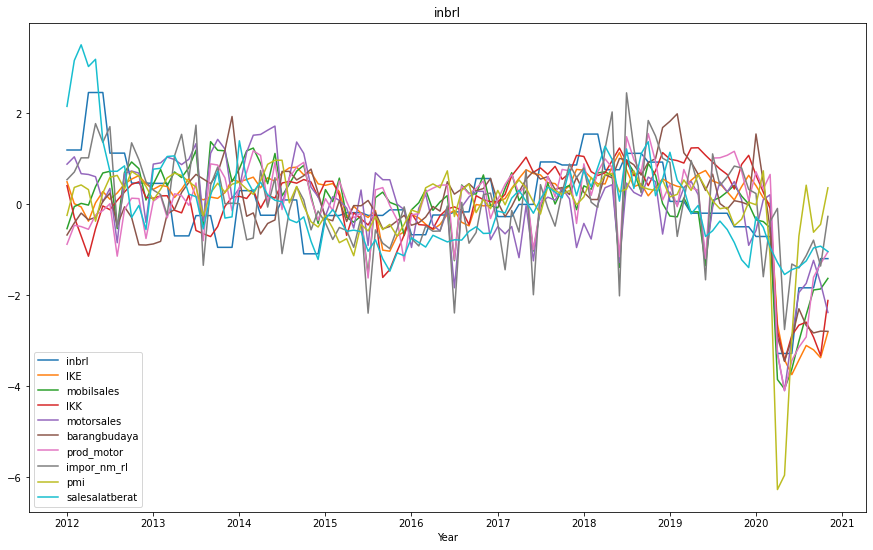

In [14]:
fig, ax = plt.subplots(figsize = (15,9))
col = data.columns
for i in data.columns:
    ax.plot(data[i],label=i)
ax.legend()
ax.set_xlabel('Year')
ax.set_title('inbrl')

In [15]:
x_train = data[:'2020-06-01'].drop(['inbrl'], axis = 1)
y_train = data.loc[:'2020-06-01', 'inbrl']
x_test = data['2020-07-01':'2020-12-01'].drop(['inbrl'], axis = 1)
y_test = data.loc['2020-07-01':'2020-12-01', 'inbrl']

In [16]:
trans = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train_poly = trans.fit_transform(x_train)
x_test_poly = trans.fit_transform(x_test)

In [17]:
column_xtrain = trans.get_feature_names(x_train.columns)
column_xtest = trans.get_feature_names(x_test.columns)

In [18]:
x_train_model = pd.DataFrame(x_train_poly, columns = column_xtrain, index = x_train.index)
x_test_model = pd.DataFrame(x_test_poly, columns = column_xtest, index = x_test.index)
tscv = TimeSeriesSplit(n_splits=11)

rmse training =  0.5530455545486292 
rmse testing =  0.602246958514053


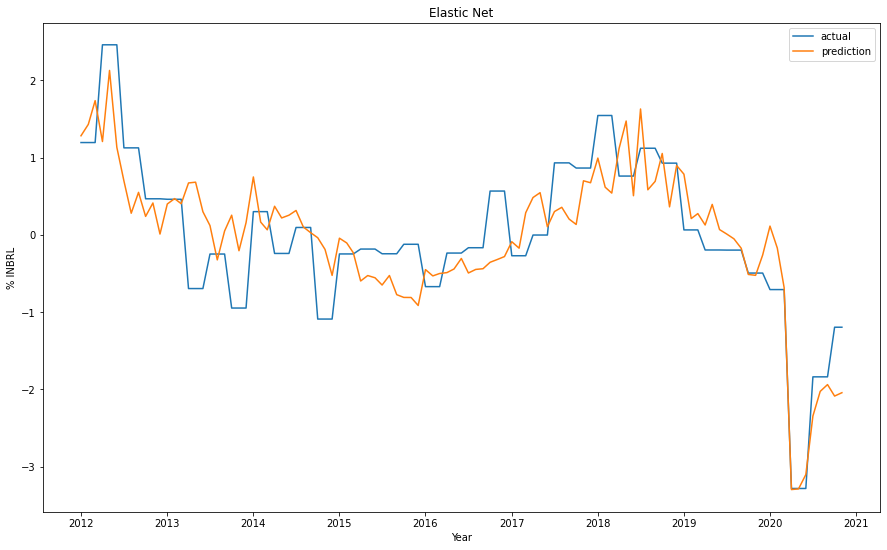

In [19]:
pipe_elastic = Pipeline([('elastic', ElasticNet())])
elnet = ElasticNet(alpha=0.01, l1_ratio=0.4, tol=0.6)
elnet_train = elnet.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_elnet = np.concatenate((elnet_train.predict(x_train_model),elnet_train.predict(x_test_model)))
yact_elnet = np.concatenate((y_train.values, y_test.values))

# plotting
df_elnet = pd.DataFrame(
    {'period': data.index, 'actual': yact_elnet, 'prediction': ypred_elnet})
df_elnet.index = df_elnet['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_elnet['actual'],label='actual')
ax.plot(df_elnet['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% INBRL')
ax.set_title('Elastic Net')

#rmse
rmse_elnet_train = rmse(elnet_train.predict(x_train_model), y_train.values)
rmse_elnet_test = rmse(elnet_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_elnet_train, 
      '\nrmse testing = ',
      rmse_elnet_test)

rmse training =  0.6066067554740998 
rmse testing =  0.7229463372871204


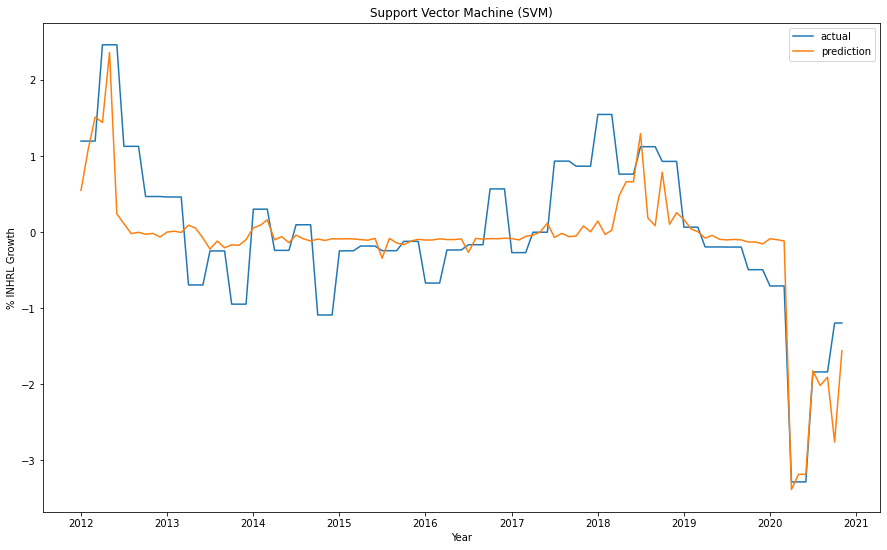

In [20]:
pipe_svr = Pipeline([('svr', SVR())])
# model running
svm = SVR(degree=2, gamma='auto', kernel='poly')
svm_train = svm.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_svm = np.concatenate((svm_train.predict(x_train_model),svm_train.predict(x_test_model)))
yact_svm = np.concatenate((y_train.values, y_test.values))

df_svm = pd.DataFrame(
    {'period': data.index, 'actual': yact_svm, 'prediction': ypred_svm})
df_svm.index = df_svm['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_svm['actual'],label='actual')
ax.plot(df_svm['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% INHRL Growth')
ax.set_title('Support Vector Machine (SVM)')

#rmse
rmse_svm_train = rmse(svm_train.predict(x_train_model), y_train.values)
rmse_svm_test = rmse(svm_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_svm_train, 
      '\nrmse testing = ',
      rmse_svm_test)

rmse training =  0.18153227641393593 
rmse testing =  0.8437606276531199


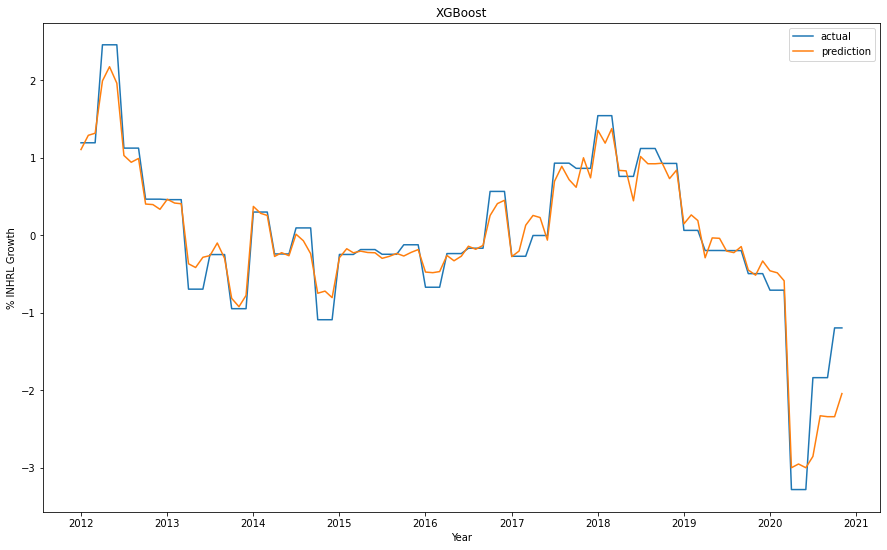

In [21]:
xgb = XGBRegressor()
pipe_xgb = Pipeline([('xgb', xgb)])
xg = XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.6, eta=0.05, gamma=0.3,
                              gpu_id=-1, importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.0500000007, max_delta_step=0,
                              max_depth=100, min_child_weight=1, 
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=0.8, tree_method='exact',
                              validate_parameters=1, verbosity=None)
xg_train = xg.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_xg = np.concatenate((xg_train.predict(x_train_model),xg_train.predict(x_test_model)))
yact_xg = np.concatenate((y_train.values, y_test.values))

df_xg = pd.DataFrame(
    {'period': data.index, 'actual': yact_xg, 'prediction': ypred_xg})
df_xg.index = df_xg['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_xg['actual'],label='actual')
ax.plot(df_xg['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% INHRL Growth')
ax.set_title('XGBoost')

#rmse
rmse_xg_train = rmse(xg_train.predict(x_train_model), y_train.values)
rmse_xg_test = rmse(xg_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_xg_train, 
      '\nrmse testing = ',
      rmse_xg_test)

rmse training =  0.22197193582082073 
rmse testing =  0.5348682656809177


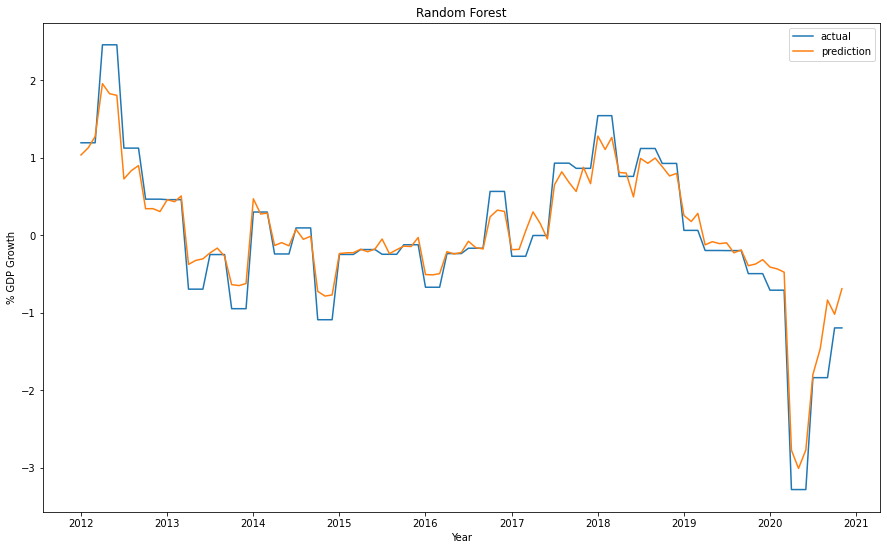

In [22]:
pipe_rfr = Pipeline([('rfr', RandomForestRegressor())])
# model running
rf = RandomForestRegressor(max_depth=380, max_features='sqrt',
                                       n_estimators=400)
rf_train = rf.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_rf = np.concatenate((rf_train.predict(x_train_model),rf_train.predict(x_test_model)))
yact_rf = np.concatenate((y_train.values, y_test.values))

# plotting
df_rf = pd.DataFrame(
    {'period': data.index, 'actual': yact_rf, 'prediction': ypred_rf})
df_rf.index = df_rf['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_rf['actual'],label='actual')
ax.plot(df_rf['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% GDP Growth')
ax.set_title('Random Forest')

#rmse
rmse_rf_train = rmse(rf_train.predict(x_train_model), y_train.values)
rmse_rf_test = rmse(rf_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_rf_train, 
      '\nrmse testing = ',
      rmse_rf_test)

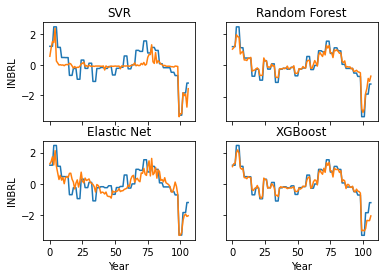

In [24]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(yact_svm)
axs[0, 0].plot(ypred_svm)
axs[0, 0].set_title('SVR')
axs[0, 1].plot(yact_rf)
axs[0, 1].plot(ypred_rf)
axs[0, 1].set_title('Random Forest')
axs[1, 0].plot(yact_elnet)
axs[1, 0].plot(ypred_elnet)
axs[1, 0].set_title('Elastic Net')
axs[1, 1].plot(yact_xg)
axs[1, 1].plot(ypred_xg)
axs[1, 1].set_title('XGBoost')

for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='INBRL')
    
for ax in axs.flat:
    ax.label_outer()